In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "GCB"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GCB/baseline

Average verified rate: 0.9407182815335127

Average of error rates: 0.06201746242263484

Total token count: 4963402



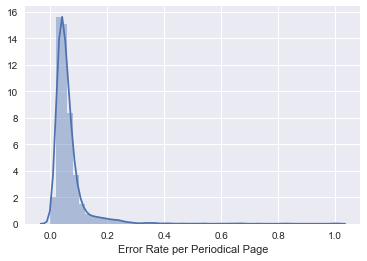

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 300 )

[('ñ', 9252),
 ('w', 9015),
 ('-', 6096),
 ('m', 5475),
 ('e', 5442),
 ("'", 4444),
 ('g', 3932),
 ('con-', 3696),
 ('r', 3563),
 ('t', 3506),
 ('d', 3149),
 ('tion', 3124),
 ('n', 3090),
 ('f', 2997),
 ('re-', 2952),
 ('¥', 2573),
 ('in-', 2261),
 ('be-', 2257),
 (')', 2219),
 (']', 1590),
 ('de-', 1457),
 ('com-', 1455),
 ('ence', 1328),
 ('ference', 1260),
 ('confer-', 1220),
 ('ment', 1167),
 ('ex-', 1151),
 ('mis-', 959),
 ('(', 928),
 ('tions', 814),
 ('--', 781),
 ('en-', 766),
 ('dis-', 732),
 ('un-', 697),
 ('ple', 686),
 ('peo-', 684),
 ('ers', 651),
 ('pre-', 599),
 ('ad-', 597),
 ('per-', 588),
 ('pro-', 575),
 ('eral', 573),
 ('ac-', 566),
 ('[congregation', 564),
 ('to-', 552),
 ('gen-', 550),
 ('ap-', 530),
 ('th', 526),
 ('u', 525),
 ('im-', 524),
 ('for-', 512),
 ('mittee', 500),
 ('an-', 466),
 ('sab-', 459),
 ('mes-', 448),
 ('--gcs', 436),
 ('sabbath-', 417),
 ('ñthe', 407),
 ('ments', 398),
 ('k', 393),
 ("'the", 387),
 ('meet-', 384),
 ('can-', 379),
 ('some-', 37

## Check Special Character Use

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)[:400]

[('ñ', 9252),
 ('¥', 2573),
 (')', 2219),
 (']', 1590),
 ('(', 928),
 ('[congregation', 564),
 ('ñthe', 407),
 ('/', 354),
 ('_', 353),
 ('(a)', 304),
 ('(b)', 278),
 ('ñno', 235),
 ('*', 217),
 ('(m)', 203),
 ('ñthat', 189),
 ('(m', 181),
 ('(c)', 180),
 ('(reading)', 146),
 ('[voices', 145),
 ('ña', 137),
 ('ã', 136),
 ('(in', 133),
 ('(d)', 120),
 ('ñit', 120),
 ('(i)', 114),
 ('ñand', 110),
 ('`', 99),
 ('ñto', 99),
 ('ñi', 98),
 ('[voice', 95),
 ('(a', 94),
 ('i)', 92),
 ('\\', 92),
 ('¥the', 91),
 ('(see', 90),
 ('ñnot', 87),
 ('[the', 86),
 ('ñin', 84),
 ('[', 84),
 ('%', 77),
 ('(e)', 77),
 ('(the', 74),
 ('¥¥', 68),
 ('[reading]', 67),
 ('ñwe', 62),
 ('sections)', 60),
 ('[congrega-', 60),
 ('ñbecause', 60),
 ('[con-', 58),
 ('ñyes', 58),
 ('the¥', 58),
 ('ñhe', 57),
 ('(page', 54),
 ('(and', 53),
 ('£', 53),
 ('=', 51),
 ('ô', 51),
 ('(continued', 50),
 ('(n)', 50),
 ('(on', 50),
 ('ñthey', 47),
 ('(s', 47),
 ('[that', 46),
 ('(or', 44),
 ('¡', 43),
 ('voice)', 43),
 ('(chair

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"’", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 1

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GCB/correction1

Average verified rate: 0.9479328127510654

Average of error rates: 0.05410234305923962

Total token count: 4947665



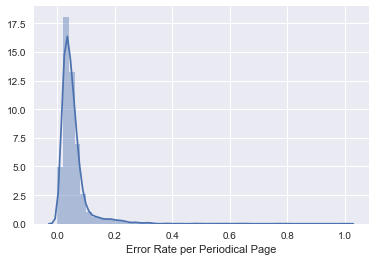

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 9114),
 ('-', 6248),
 ('m', 5887),
 ('e', 5602),
 ("'", 4590),
 ('g', 3985),
 ('con-', 3760),
 ('t', 3638),
 ('r', 3635),
 ('d', 3331),
 ('n', 3186),
 ('tion', 3135),
 ('f', 3064),
 ('re-', 2959),
 ('in-', 2270),
 ('be-', 2268),
 ('de-', 1464),
 ('com-', 1456),
 ('ence', 1334),
 ('ference', 1262),
 ('confer-', 1222),
 ('ment', 1169),
 ('ex-', 1151),
 ('mis-', 959),
 ('tions', 816),
 ('--', 808),
 ('en-', 767),
 ('dis-', 733),
 ('un-', 700),
 ('ple', 688),
 ('peo-', 684),
 ('ers', 655),
 ('pre-', 601),
 ('ad-', 597),
 ('per-', 590),
 ('pro-', 575),
 ('eral', 574),
 ('ac-', 566),
 ('to-', 553),
 ('gen-', 553),
 ('u', 539),
 ('th', 534),
 ('ap-', 531),
 ('im-', 527),
 ('for-', 513),
 ('mittee', 501),
 ('an-', 466),
 ('sab-', 460),
 ('mes-', 450),
 ('--gcs', 436)]

## Correction 2 -- Fix line endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = "correction1"
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 2

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GCB/correction2

Average verified rate: 0.9687233876242939

Average of error rates: 0.034968611847922194

Total token count: 4861460



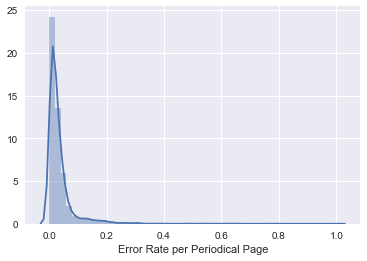

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 9111),
 ('-', 6201),
 ('m', 5884),
 ('e', 5586),
 ("'", 4590),
 ('g', 3980),
 ('r', 3625),
 ('t', 3625),
 ('d', 3327),
 ('n', 3183),
 ('f', 3054),
 ('--', 808),
 ('tion', 686),
 ('u', 539),
 ('th', 533),
 ('--gcs', 436),
 ('k', 395),
 ("'the", 391),
 ('ence', 363),
 ('co', 359),
 ("the'", 319),
 ('ference', 311),
 ('wm', 284),
 ('x', 276),
 ('con-', 272),
 ('z', 247),
 ('ment', 246),
 ("'of", 232),
 ('re-', 225),
 ('oo', 222),
 ('by-laws', 221),
 ('ex', 212),
 ('il', 202),
 ('ple', 176),
 ('in-', 172),
 ('mo', 171),
 ('sabbathschool', 170),
 ('-the', 167),
 ('ers', 164),
 ("'to", 163),
 ('de-', 161),
 ("to'", 153),
 ('tions', 153),
 ('mc', 150),
 ('eral', 146),
 ('first-day', 139),
 ('be-', 135),
 ('confer-', 135),
 ("'and", 132),
 ("'be", 130)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = "correction2"
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GCB186305XX-VXX-XX-page1.txt: [('-', ''), ('--some', '-some'), ('--GCS', '-GCS'), ('-', '')]
GCB186305XX-VXX-XX-page2.txt: [('--GCS', '-GCS'), ('-', '')]
GCB186305XX-VXX-XX-page3.txt: [('--GCS', '-GCS'), ('-', '')]
GCB186305XX-VXX-XX-page4.txt: [('--GCS', '-GCS'), ('-', '')]
GCB186305XX-VXX-XX-page5.txt: [('--GCS', '-GCS'), ('-', '')]
GCB186305XX-VXX-XX-page6.txt: [('--to', '-to'), ('--GCS', '-GCS'), ('-', '')]
GCB186305XX-VXX-XX-page7.txt: [('--GCS', '-GCS'), ('-', '')]
GCB186305XX-VXX-XX-page8.txt: [('--GCS', '-GCS'), ('-', '')]
GCB186405XX-VXX-XX-page1.txt: [('--GCS', '-GCS'), ('-', '')]
GCB186405XX-VXX-XX-page2.txt: [('--GCS', '-GCS'), ('-', '')]
GCB186405XX-VXX-XX-page3.txt: [('year---------------------', 'year--------------------'), ('year---------------------', 'year--------------------'), ('Total--------------------', 'Total-------------------'), ('Loughborough-------------------', 'Loughborough------------------'), ('--GCS', '-GCS'), ('-', '')]
GCB186505XX-VXX-XX-page1.txt: [(

## Check Correction 3

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GCB/correction3

Average verified rate: 0.9729776654900703

Average of error rates: 0.028496463306808134

Total token count: 4866863



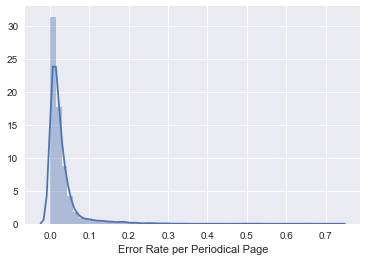

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 9137),
 ('m', 5893),
 ('e', 5615),
 ("'", 4709),
 ('g', 3987),
 ('t', 3674),
 ('r', 3663),
 ('d', 3338),
 ('n', 3217),
 ('f', 3068),
 ('tion', 687),
 ('co', 576),
 ('u', 546),
 ('th', 544),
 ('re', 432),
 ('k', 398),
 ("'the", 393),
 ('ence', 364),
 ("the'", 325),
 ('ference', 311),
 ('ex', 299),
 ('wm', 285),
 ('x', 279),
 ('z', 251),
 ('ment', 248),
 ("'of", 234),
 ('oo', 223),
 ('il', 204),
 ('mo', 181),
 ('ple', 177),
 ('mc', 177),
 ('sabbathschool', 170),
 ("'to", 166),
 ('ers', 164),
 ("to'", 157),
 ('tions', 153),
 ('eral', 147),
 ("'and", 133),
 ("'be", 132),
 ('basle', 130),
 ("'in", 129),
 ("'i", 129),
 ('mt', 125),
 ('mittee', 122),
 ("in'", 121),
 ('io', 119),
 ('pa', 118),
 ('va', 117),
 ('al', 117),
 ('partment', 114)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = "correction3"
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 3:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 4

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GCB/correction4

Average verified rate: 0.9744648636029983

Average of error rates: 0.02711184792219275

Total token count: 4866236



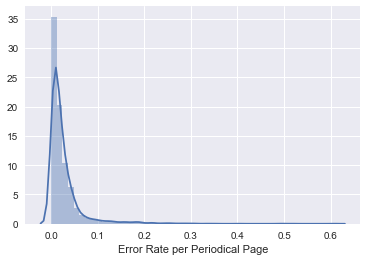

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 9149),
 ('m', 5901),
 ('e', 5631),
 ('g', 3990),
 ("'", 3866),
 ('t', 3712),
 ('r', 3668),
 ('d', 3347),
 ('n', 3233),
 ('f', 3089),
 ('tion', 688),
 ('co', 577),
 ('th', 546),
 ('u', 546),
 ('re', 444),
 ('k', 399),
 ('ence', 364),
 ('ference', 312),
 ("the'", 300),
 ('ex', 299),
 ('wm', 285),
 ('x', 280),
 ('z', 251),
 ('ment', 248),
 ('oo', 223),
 ('il', 206),
 ('mo', 182),
 ('mc', 178),
 ('ple', 177),
 ('sabbathschool', 170),
 ('ers', 164),
 ('tions', 154),
 ("to'", 147),
 ('eral', 147),
 ('basle', 130),
 ('mt', 125),
 ('mittee', 122),
 ('io', 119),
 ('pa', 119),
 ('va', 118),
 ('al', 117),
 ('partment', 114),
 ("in'", 110),
 ('sionary', 109),
 ('ulletin', 107),
 ("and'", 102),
 ('mis', 102),
 ("canvassers'", 100),
 ('ky', 97),
 ('by-laws', 95)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = "correction4"
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 5

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GCB/correction5

Average verified rate: 0.974466987655691

Average of error rates: 0.02711427939876216

Total token count: 4866210



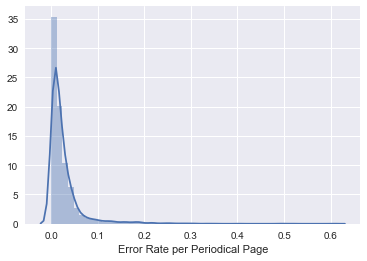

In [26]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 9149),
 ('m', 5900),
 ('e', 5628),
 ('g', 3989),
 ("'", 3866),
 ('t', 3709),
 ('r', 3661),
 ('d', 3346),
 ('n', 3230),
 ('f', 3089),
 ('tion', 688),
 ('co', 577),
 ('th', 546),
 ('u', 544),
 ('re', 444),
 ('k', 399),
 ('ence', 364),
 ('ference', 312),
 ("the'", 300),
 ('ex', 299),
 ('wm', 285),
 ('x', 280),
 ('z', 251),
 ('ment', 248),
 ('oo', 223),
 ('il', 206),
 ('mo', 182),
 ('mc', 178),
 ('ple', 177),
 ('sabbathschool', 170),
 ('ers', 164),
 ('tions', 154),
 ("to'", 147),
 ('eral', 147),
 ('basle', 130),
 ('mt', 125),
 ('mittee', 122),
 ('io', 119),
 ('pa', 119),
 ('va', 118),
 ('al', 117),
 ('partment', 114),
 ("in'", 110),
 ('sionary', 109),
 ('ulletin', 107),
 ("and'", 102),
 ('mis', 102),
 ("canvassers'", 100),
 ('ky', 97),
 ('by-laws', 95)]

## Correction 6 -- Rejoin Split Words I

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = "correction5"
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 6

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GCB/correction6

Average verified rate: 0.974720198107879

Average of error rates: 0.026836427939876215

Total token count: 4865228



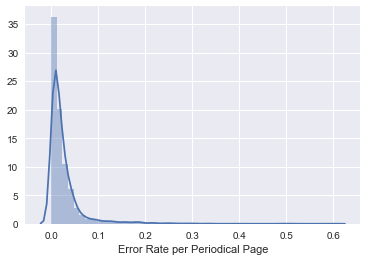

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 9146),
 ('m', 5929),
 ('e', 5605),
 ('g', 3986),
 ("'", 3866),
 ('t', 3696),
 ('r', 3653),
 ('d', 3342),
 ('n', 3216),
 ('f', 3087),
 ('tion', 668),
 ('u', 544),
 ('th', 528),
 ('k', 395),
 ('co', 387),
 ('ence', 364),
 ('re', 330),
 ('ference', 312),
 ("the'", 300),
 ('ex', 291),
 ('wm', 284),
 ('x', 279),
 ('z', 251),
 ('ment', 247),
 ('oo', 223),
 ('il', 195),
 ('mo', 173),
 ('ple', 172),
 ('sabbathschool', 170),
 ('ers', 162),
 ('tions', 150),
 ("to'", 147),
 ('eral', 147),
 ('basle', 130),
 ('mt', 124),
 ('mittee', 122),
 ('io', 118),
 ('va', 116),
 ('pa', 115),
 ('partment', 114),
 ("in'", 110),
 ('ulletin', 107),
 ("and'", 102),
 ("canvassers'", 100),
 ('al', 98),
 ('ky', 97),
 ('by-laws', 95),
 ('seventhday', 93),
 ('sionary', 93),
 ('-', 90)]

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = "correction6"
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 7

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GCB/correction7

Average verified rate: 0.9748495954949369

Average of error rates: 0.026694297082228115

Total token count: 4864216



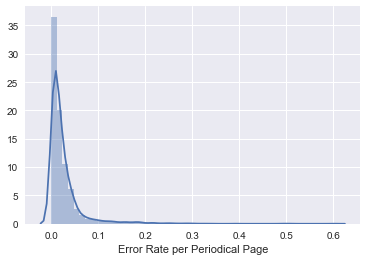

In [32]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 9136),
 ('m', 5917),
 ('e', 5600),
 ('g', 3980),
 ("'", 3866),
 ('t', 3692),
 ('r', 3651),
 ('d', 3341),
 ('n', 3214),
 ('f', 3080),
 ('tion', 667),
 ('u', 544),
 ('th', 519),
 ('k', 394),
 ('co', 380),
 ('ence', 344),
 ("the'", 300),
 ('ex', 291),
 ('wm', 284),
 ('x', 279),
 ('ference', 277),
 ('re', 262),
 ('z', 251),
 ('oo', 222),
 ('ment', 216),
 ('il', 191),
 ('ple', 172),
 ('mo', 172),
 ('sabbathschool', 170),
 ('tions', 148),
 ("to'", 147),
 ('ers', 141),
 ('eral', 140),
 ('basle', 130),
 ('mt', 124),
 ('io', 118),
 ('va', 116),
 ('mittee', 116),
 ('pa', 115),
 ("in'", 110),
 ("and'", 102),
 ("canvassers'", 100),
 ('ky', 97),
 ('by-laws', 95),
 ('sionary', 93),
 ('seventhday', 92),
 ('al', 91),
 ('-', 90),
 ("a'", 87),
 ('ga', 84)]

## Review Remaining Errors

In [34]:
GoH.reports.docs_with_high_error_rate(summary)

[('GCB19090526-V06-11-page7.txt', 0.602),
 ('GCB18990217-V08-02-page12.txt', 0.509),
 ('GCB18930305-V05-23-page8.txt', 0.5),
 ('GCB19180410-V08-09-page15.txt', 0.491),
 ('GCB19090601-V06-16-page25.txt', 0.393),
 ('GCB19090601-V06-16-page23.txt', 0.341),
 ('GCB19030408-V05-08-page13.txt', 0.328),
 ('GCB19090601-V06-16-page27.txt', 0.319),
 ('GCB19130516-V07-01-page14.txt', 0.303),
 ('GCB189504XX-V01-02-page37.txt', 0.303),
 ('GCB189504XX-V01-02-page36.txt', 0.3),
 ('GCB1901XXXX-V04-03-page33.txt', 0.291),
 ('GCB1902XXXX-V04-06,07-page24.txt', 0.288),
 ('GCB1901XXXX-V04-03-page27.txt', 0.288),
 ('GCB19090601-V06-16-page21.txt', 0.288),
 ('GCB189504XX-V01-02-page33.txt', 0.281),
 ('GCB189504XX-V01-02-page38.txt', 0.275),
 ('GCB189504XX-V01-02-page34.txt', 0.27),
 ('GCB19130516-V07-01-page13.txt', 0.267),
 ('GCB18930224-V05-16-page12.txt', 0.264),
 ('GCB189504XX-V01-02-page35.txt', 0.257),
 ('GCB189504XX-V01-02-page32.txt', 0.254),
 ('GCB1902XXXX-V04-06,07-page32.txt', 0.253),
 ('GCB1901XX

In [35]:
doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.3]

In [36]:
# GoH.utilities.open_original_docs(doc_keys, directories['cycle'])

In [37]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['long-established',
  'wayself-supporting',
  'needencouragement',
  'recommendameetings',
  'spiriltefrtommuask',
  'yrazilorninittee',
  'resolutionsrespectingsouthern',
  'nnintentienallii',
  'discussunderstand',
  'self-existingspirit',
  'leiecitzcidaidcosi',
  'comparathroughout',
  'rationarremedies',
  'genericconferenceproceedings',
  'woxideriutclehaiiges',
  'earnestipeasants',
  'lottannottountit',
  'non-dividend-paying',
  'dellartintroduced',
  'bespitahsanitariunt',
  'deceasesecretary',
  'inexhaustiblewealth',
  'encroachstatement',
  'sell-righteousness',
  'independpictures',
  'commandmentkeeper',
  'prelimidelegates',
  'faaccommodations',
  'theinternational',
  'notbepossiblethat',
  'eheekneeeekneentramoirstiffaro',
  'licensedmissionariesl',
  "frbin'aifferereplaces",
  'perishsanitariums',
  'everlastinglragainst',
  "'ourteaehse'rwere",
  'interspersedwith',
  'valentfintilivero',
  'followinginterest',
  'operaestablishing',
  'mtihtiaclitiilewnnfvtoerte

## Correction 8 -- Remove long error tokens

In [39]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    sub_list = ["m|M", "i|I", "n|N", "e|E", "f|F", "l|L", "t|T"]
    
    replacements = []
    for sub in sub_list:
        replacements.append(GoH.clean.check_for_repeating_characters(tokens, sub))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GCB19010416-V04-01ex12-page17.txt: [('CCONNFFEERREENNCCEE', ' ')]
GCB19130516-V07-01-page13.txt: [('MMUIRIMCNIIIIIIMIIIIINIMMITIMIIIIMIIMIIIIMM', ' '), ('TIIIIIIIIIIIIIIIIIIIII', ' '), ('MMUIRIMCNIIIIIIMIIIIINIMMITIMIIIIMIIMIIIIMM', ' ')]
GCB19130516-V07-01-page53.txt: [('immuummummummymmummilm', ' '), ('OMMOMMOMMIMMAMMERNMEMMINMPUMMOMIENNEMMAgimpimmull', ' '), ('MIMENCIMMENROMMINIMMON', ' '), ('mmuurraingurdimmmumemmummemmommlommiummommilir', ' '), ('limmillimmommissmaimmorm', ' '), ('mommempummAmmilmrammomammummammunimmummummesso', ' '), ('.iMMMMMMIMONOMMEMOMEMINEMEMMIMMOMIMMINIMOROMEMOWIMMOmmo', ' '), ('IIIIIIIIIIIIIIiimiiiiiiiiiiimiiiiimminiamiligullimillumil', ' '), ('imbiiiiii.iiiiiiii..i.iiil', ' '), ('IIIIIIIIIIiiiiii', ' '), ('WilliiIiiiniiiiiIiiiiiiliOlfiliiiiii', ' '), ("iiiiiiiiiiiiiiiiiiiIiruelmlI'Wil'ilNli", ' '), ('iiniiiiiMErNIlIiIiWnWlIi', ' '), ('liiiiNiIiiIIiiiiinMIdliiiiiii', ' '), ('IIIIIIIIIIIIIngligillimilm', ' '), ('golPitiallEfiffiffEilliiiffilEriiilifra', ' ')

## Correction 9 -- Separate Squash Words

In [41]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction9"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GCB18881023-V02-04,05,06-page12.txt: [('definiteapportionment', 'definite apportionment')]
GCB18881026-V02-07,08,09-page4.txt: [('Temperancemeetings', 'Temperance meetings')]
GCB18891101-V03-13-page3.txt: [('religiouslegislation', 'religious legislation')]
GCB18891105-V03-15-page7.txt: [('cannotengageinthislineofworkwithoutimpairinghisefficiencyas', 'cannot engage in this line of work without impair ing his efficiency as')]
GCB18910306-V04-01-page10.txt: [('ingwasopenedwhithymnNo', 'ing was opened whit hymn No')]
GCB18910308-V04-02-page2.txt: [('liberalitymanifested', 'liberality manifested')]
GCB18910309-V04-03-page5.txt: [('Conferencesinterested', 'Conferences interested')]
GCB18910313-V04-07-page3.txt: [('HewasconvertedfromtheRussianChurchbythe', 'He was converted from the Russian Church by the')]
GCB18930129-V05-02-page21.txt: [('fitrepresentatives', 'fit representatives')]
GCB18930206-V05-06-page12.txt: [('inexhaustiblewealth', 'inexhaustible wealth')]
GCB18930215-V05-11-page16.tx

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GCB/correction9

Average verified rate: 0.9748856110194958

Average of error rates: 0.026651193633952252

Total token count: 4864542



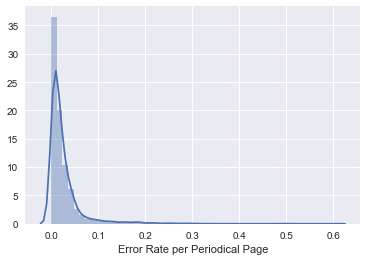

In [44]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [45]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 9136),
 ('m', 5918),
 ('e', 5606),
 ('g', 3980),
 ("'", 3866),
 ('t', 3695),
 ('r', 3652),
 ('d', 3343),
 ('n', 3220),
 ('f', 3080),
 ('tion', 667),
 ('u', 546),
 ('th', 519),
 ('k', 394),
 ('co', 380),
 ('ence', 344),
 ("the'", 300),
 ('ex', 291),
 ('wm', 284),
 ('x', 279),
 ('ference', 277),
 ('re', 262),
 ('z', 251),
 ('oo', 222),
 ('ment', 216),
 ('il', 191),
 ('ple', 172),
 ('mo', 172),
 ('sabbathschool', 170),
 ('tions', 148),
 ("to'", 147),
 ('ers', 141),
 ('eral', 140),
 ('basle', 130),
 ('mt', 124),
 ('io', 118),
 ('va', 116),
 ('mittee', 116),
 ('pa', 115),
 ("in'", 110),
 ("and'", 102),
 ("canvassers'", 100),
 ('ky', 97),
 ('by-laws', 95),
 ('sionary', 93),
 ('seventhday', 92),
 ('al', 91),
 ('-', 90),
 ("a'", 87),
 ('ga', 84)]